# Basic Model Analysis

1. Fetch pre-processed data
2. Train Model
3. Compare Basic Models Performance

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#sklearn Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score, confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict


import warnings
warnings.filterwarnings(action = 'ignore')

# Libraries for ploting charts
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go

%matplotlib notebook
%matplotlib inline

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

**1. Fetch pre-processed data**

In [3]:
data = pd.DataFrame()

data = pd.read_csv('../datasets/data-preprocessed.csv', low_memory=False)

In [4]:
x = data.iloc[:,:len(data.columns)-1]
y = data['total']
x

,model,generation,series,body_type,number_of_seats,curb_weight_kg,max_trunk_capacity_l,number_of_cylinders,engine_type,valves_per_cylinder,capacity_cm3,engine_hp,drive_wheels,number_of_gears,transmission,fuel_tank_capacity_l,max_speed_km_per_h,city_fuel_per_100km_l,fuel_grade,rear_brakes
0,0.000000,0.000876,0.000000,0.066667,0.034483,0.000671,0.000947,0.111111,0.111111,0.166667,0.001149,0.002160,0.166667,0.1,0.166667,0.007353,0.004167,0.003636,0.045455,0.090909
1,0.000000,0.000876,0.000000,0.066667,0.034483,0.000671,0.000947,0.111111,0.111111,0.166667,0.001149,0.002160,0.166667,0.2,0.333333,0.007353,0.008333,0.007273,0.045455,0.090909
2,0.000000,0.000876,0.000000,0.066667,0.034483,0.000671,0.000947,0.111111,0.111111,0.166667,0.002299,0.004320,0.166667,0.1,0.166667,0.007353,0.004167,0.003636,0.045455,0.090909
3,0.000000,0.000876,0.000000,0.066667,0.034483,0.000671,0.000947,0.111111,0.111111,0.166667,0.002299,0.004320,0.166667,0.2,0.333333,0.007353,0.008333,0.007273,0.045455,0.090909
4,0.000000,0.000876,0.000000,0.066667,0.034483,0.001342,0.000947,0.222222,0.111111,0.166667,0.003448,0.006479,0.166667,0.1,0.166667,0.007353,0.000000,0.003636,0.090909,0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43042,0.998943,0.000876,0.003891,0.200000,0.034483,0.414765,0.720644,0.111111,0.111111,0.333333,0.411494,0.838013,0.166667,0.2,0.333333,0.514706,0.504167,0.000000,0.136364,0.181818
43043,0.998943,0.000876,0.003891,0.200000,0.034483,0.077181,0.002841,0.111111,0.111111,0.333333,1.000000,0.196544,0.166667,0.2,0.333333,0.161765,0.304167,0.000000,0.136364,0.181818
43044,0.998943,0.000876,0.003891,0.200000,0.034483,0.414765,0.720644,0.111111,0.111111,0.333333,0.405747,0.663067,0.166667,0.2,0.333333,0.514706,0.504167,0.000000,0.136364,0.181818
43045,1.000000,0.000876,0.003891,0.200000,0.034483,0.414765,0.558712,0.111111,0.111111,0.333333,0.411494,0.313175,0.166667,0.2,0.333333,0.558824,0.758333,0.000000,0.136364,0.181818


**2. Train Model**

In [5]:
# standard scaler
columns = x.columns
scaler = StandardScaler()
X_std = scaler.fit_transform(x)
X_std = pd.DataFrame(X_std, columns = columns)


X_std.head()

,model,generation,series,body_type,number_of_seats,curb_weight_kg,max_trunk_capacity_l,number_of_cylinders,engine_type,valves_per_cylinder,capacity_cm3,engine_hp,drive_wheels,number_of_gears,transmission,fuel_tank_capacity_l,max_speed_km_per_h,city_fuel_per_100km_l,fuel_grade,rear_brakes
0,-1.736461,-0.81269,-0.558153,-0.719304,-0.295201,-0.735018,-0.796007,-0.271018,-0.303754,-0.241637,-0.950450,-0.916182,-0.45353,-0.673058,-0.618702,-0.853188,-0.771596,-0.798583,-0.903041,-0.409875
1,-1.736461,-0.81269,-0.558153,-0.719304,-0.295201,-0.735018,-0.796007,-0.271018,-0.303754,-0.241637,-0.950450,-0.916182,-0.45353,-0.035066,0.504070,-0.853188,-0.750229,-0.779333,-0.903041,-0.409875
2,-1.736461,-0.81269,-0.558153,-0.719304,-0.295201,-0.735018,-0.796007,-0.271018,-0.303754,-0.241637,-0.946013,-0.905410,-0.45353,-0.673058,-0.618702,-0.853188,-0.771596,-0.798583,-0.903041,-0.409875
3,-1.736461,-0.81269,-0.558153,-0.719304,-0.295201,-0.735018,-0.796007,-0.271018,-0.303754,-0.241637,-0.946013,-0.905410,-0.45353,-0.035066,0.504070,-0.853188,-0.750229,-0.779333,-0.903041,-0.409875
4,-1.736461,-0.81269,-0.558153,-0.719304,-0.295201,-0.731931,-0.796007,0.475496,-0.303754,-0.241637,-0.941576,-0.894638,-0.45353,-0.673058,-0.618702,-0.853188,-0.792963,-0.798583,-0.421997,-0.409875


In [6]:

x_train, x_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state = 10)

lr_std = LinearRegression()
lr_std.fit(x_train, y_train)
y_pred = lr_std.predict(x_test)
print('Accuracy of linear regression on test set with standardized features: {:.2f}'.format(lr_std.score(x_test, y_test)))

Accuracy of linear regression on test set with standardized features: 0.92


In [7]:
# standard scaler
norm = MinMaxScaler()
X_norm = norm.fit_transform(x)
X_norm = pd.DataFrame(X_norm, columns = columns)


X_norm.head()

,model,generation,series,body_type,number_of_seats,curb_weight_kg,max_trunk_capacity_l,number_of_cylinders,engine_type,valves_per_cylinder,capacity_cm3,engine_hp,drive_wheels,number_of_gears,transmission,fuel_tank_capacity_l,max_speed_km_per_h,city_fuel_per_100km_l,fuel_grade,rear_brakes
0,0.0,0.000876,0.0,0.066667,0.034483,0.000671,0.000947,0.111111,0.111111,0.166667,0.001149,0.002160,0.166667,0.1,0.166667,0.007353,0.004167,0.003636,0.045455,0.090909
1,0.0,0.000876,0.0,0.066667,0.034483,0.000671,0.000947,0.111111,0.111111,0.166667,0.001149,0.002160,0.166667,0.2,0.333333,0.007353,0.008333,0.007273,0.045455,0.090909
2,0.0,0.000876,0.0,0.066667,0.034483,0.000671,0.000947,0.111111,0.111111,0.166667,0.002299,0.004320,0.166667,0.1,0.166667,0.007353,0.004167,0.003636,0.045455,0.090909
3,0.0,0.000876,0.0,0.066667,0.034483,0.000671,0.000947,0.111111,0.111111,0.166667,0.002299,0.004320,0.166667,0.2,0.333333,0.007353,0.008333,0.007273,0.045455,0.090909
4,0.0,0.000876,0.0,0.066667,0.034483,0.001342,0.000947,0.222222,0.111111,0.166667,0.003448,0.006479,0.166667,0.1,0.166667,0.007353,0.000000,0.003636,0.090909,0.090909


In [8]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X_norm, y, test_size = 0.3, random_state = 10)

lr_norm = LinearRegression()
lr_norm.fit(x1_train, y1_train)
y_pred = lr_norm.predict(x1_test)
print('Accuracy of linear regression on test set with Normalized features: {:.2f}'.format(lr_norm.score(x1_test, y1_test)))


Accuracy of linear regression on test set with Normalized features: 0.92


In [9]:
Standardize_Var = ['model']
Standardize_transformer = Pipeline(steps=[('standard', StandardScaler())])
Normalize_Var = ['generation','series','body_type','number_of_seats','curb_weight_kg',
                 'max_trunk_capacity_l','number_of_cylinders','engine_type','valves_per_cylinder','capacity_cm3',
                 'engine_hp','drive_wheels','number_of_gears','transmission','fuel_tank_capacity_l',
                 'max_speed_km_per_h','city_fuel_per_100km_l','fuel_grade','rear_brakes',]
Normalize_transformer = Pipeline(steps=[('norm', MinMaxScaler())])

In [10]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y, test_size=0.3)
preprocessor = ColumnTransformer(transformers= [('standard', Standardize_transformer, Standardize_Var), 
                                                ('norm', Normalize_transformer, Normalize_Var)])
clf = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
clf.fit(x2_train, y2_train)
print('Accuracy after standardizing Gaussian distributed features and normalizing Non-Gaussian features: {:.2f}'.format(clf.score(x2_test, y2_test)))

Accuracy after standardizing Gaussian distributed features and normalizing Non-Gaussian features: 0.92


In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [12]:
x_train.head()

,model,generation,series,body_type,number_of_seats,curb_weight_kg,max_trunk_capacity_l,number_of_cylinders,engine_type,valves_per_cylinder,capacity_cm3,engine_hp,drive_wheels,number_of_gears,transmission,fuel_tank_capacity_l,max_speed_km_per_h,city_fuel_per_100km_l,fuel_grade,rear_brakes
30028,0.731501,0.002627,0.001297,0.000000,0.034483,0.000000,0.000000,0.111111,0.333333,0.166667,0.857471,0.002160,0.166667,0.2,0.333333,0.250000,0.020833,0.000000,0.045455,0.000000
2690,0.052854,0.081436,0.011673,0.333333,0.034483,0.188591,0.104167,0.222222,0.222222,0.166667,0.117241,0.030238,0.333333,0.4,0.166667,0.044118,0.141667,0.000000,0.227273,0.272727
40494,0.947146,0.990368,0.001297,0.133333,0.034483,0.412081,0.079545,0.111111,0.111111,0.333333,0.090805,0.092873,0.333333,0.2,0.333333,0.066176,0.012500,0.021818,0.136364,0.090909
536,0.029598,0.001751,0.038911,0.066667,0.103448,0.004027,0.038826,0.666667,0.111111,0.166667,0.070115,0.228942,0.666667,0.3,0.333333,0.176471,0.383333,0.349091,0.136364,0.272727
21021,0.554968,0.525394,0.345006,0.866667,0.034483,0.056376,0.000000,0.111111,0.111111,0.333333,0.095402,0.041037,0.666667,0.6,0.166667,0.279412,0.491667,0.014545,0.045455,0.181818


In [13]:
x_test.head()

,model,generation,series,body_type,number_of_seats,curb_weight_kg,max_trunk_capacity_l,number_of_cylinders,engine_type,valves_per_cylinder,capacity_cm3,engine_hp,drive_wheels,number_of_gears,transmission,fuel_tank_capacity_l,max_speed_km_per_h,city_fuel_per_100km_l,fuel_grade,rear_brakes
35716,0.840381,0.848511,0.070039,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4819,0.096195,0.156743,0.000000,0.066667,0.103448,0.161074,0.083333,0.222222,0.111111,0.166667,0.150575,0.345572,0.666667,0.3,0.333333,0.044118,0.079167,0.021818,0.181818,0.272727
7337,0.146934,0.253065,0.003891,0.200000,0.034483,0.075168,0.081439,0.111111,0.111111,0.333333,0.281609,0.643629,0.166667,0.2,0.333333,0.522059,0.500000,0.054545,0.045455,0.181818
37742,0.884778,0.001751,0.002594,0.000000,0.034483,0.151678,0.837121,0.111111,0.222222,0.166667,0.274713,0.043197,0.166667,0.2,0.500000,0.272059,0.058333,0.000000,0.227273,0.181818
27286,0.656448,0.007005,0.045396,0.066667,0.103448,0.000000,0.626894,0.222222,0.111111,0.333333,0.803448,0.861771,0.666667,0.1,0.166667,0.448529,0.000000,0.000000,0.045455,0.181818


**3. Compare Basic Models Performance**

In [14]:
# Function for evaluating model performance
def model_performance(model,model_name,x_train = x_train,y_train = y_train,x_test = x_test,y_test = y_test):
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    Training_Score = np.round(model.score(x_train,y_train),20)
    Testing_Score = np.round(model.score(x_test,y_test),20)
    
    mse_training = np.round(mean_squared_error(y_train,y_train_pred),20)
    mse_testing = np.round(mean_squared_error(y_test,y_test_pred),20)
    
    rmse_training = np.round(mean_squared_error(y_train,y_train_pred, squared=False),20)
    rmse_testing = np.round(mean_squared_error(y_test,y_test_pred, squared=False),20)
    
    mae_training = np.round(mean_absolute_error(y_train,y_train_pred),20)
    mae_testing = np.round(mean_absolute_error(y_test,y_test_pred),20)
    
    r2_training = np.round(r2_score(y_train,y_train_pred),20)
    r2_testing = np.round(r2_score(y_test,y_test_pred),20)
    
    print("Model Performance for:",model_name)
    print("")
    
    print("Training Score:",Training_Score)
    print("Testing Score:",Testing_Score)
    print("")
    
    print("Training Data MSE:",mse_training)
    print("Testing Data MSE:",mse_testing)
    print("")
    
    print("Training Data RMSE:",rmse_training)
    print("Testing Data RMSE:",rmse_testing)
    print("")
    
    print("Training Data MAE:",mae_training)
    print("Testing Data MAE:",mae_testing)
    print("")
    
    print("Training Data R2:",r2_training)
    print("Testing Data R2:",r2_testing)
    print("")
    
    print("Residual Analysis:")
    plt.figure(figsize = (20,5))
    plt.scatter(y_train,(y_train-y_train_pred),color = "red",label = 'Training Predictions')
    plt.scatter(y_test,(y_test-y_test_pred),color = "green",label = 'Testing Predictions', alpha=0.5)
    plt.legend(loc="upper left")
    plt.title("Training Predictions v/s Testing Predictions")
    plt.show()
    
    
    plt.figure(figsize = (20,5))
    plt.scatter(x=y_train, y=y_train_pred, c="#6495ED", alpha=0.3)
    z = np.polyfit(y_train, y_train_pred, 1)
    p = np.poly1d(z)
    plt.plot(y_train,p(y_train),"#DC143C")
    plt.ylabel('Predicted Sales')
    plt.xlabel('Real Sales')
    
    return Training_Score,Testing_Score,mse_training,mse_testing,mae_training,mae_testing,r2_training,r2_testing

# 1. Linear Regresssion

Model Performance for: LinearRegression()

Training Score: 0.9228111637971691
Testing Score: 0.924610906761897

Training Data MSE: 0.006697672217479657
Testing Data MSE: 0.0066079996078652215

Training Data RMSE: 0.08183930728861076
Testing Data RMSE: 0.0812896033196449

Training Data MAE: 0.03161685124332672
Testing Data MAE: 0.0321815836568959

Training Data R2: 0.9228111637971691
Testing Data R2: 0.924610906761897

Residual Analysis:


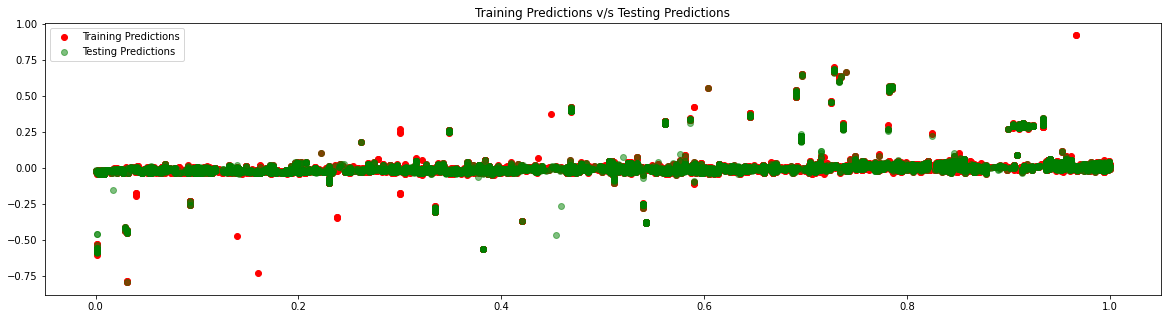

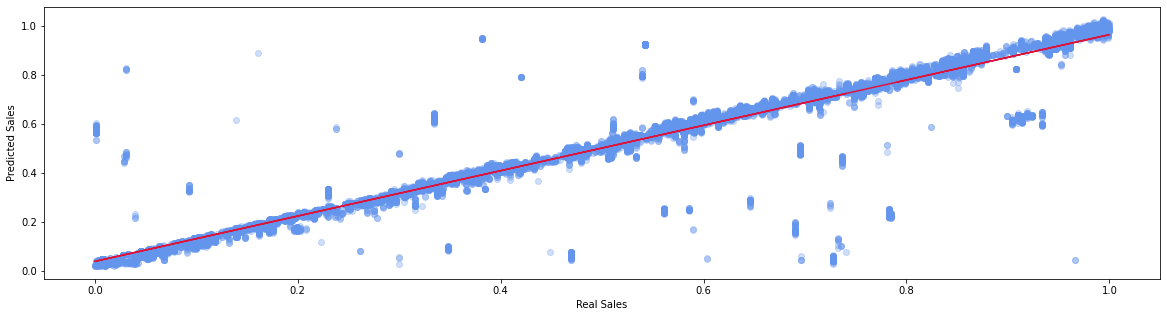

In [15]:
model = LinearRegression()
model.fit(x_train,y_train)
LR_performance = model_performance(model,model_name = model)

# 2. Ridge Regression

In [16]:
param_grid = {'alpha':np.random.rand(100)}
grid = GridSearchCV(Ridge(),param_grid = param_grid,cv=5)
grid.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.33209114, 0.91290122, 0.0010689 , 0.93784173, 0.97355053,
       0.06686541, 0.352808  , 0.83139052, 0.91711923, 0.82814111,
       0.64180329, 0.05599731, 0.34592172, 0.69441771, 0.26964266,
       0.10169676, 0.07725414, 0.10429052, 0.02294415, 0.14176548,
       0.53835165, 0.30444739, 0.86259769, 0.53820407, 0.13444245,
       0.42585997, 0.25...
       0.71115631, 0.06902639, 0.49051837, 0.49200465, 0.28942928,
       0.17190147, 0.73738604, 0.74161556, 0.38815117, 0.79827262,
       0.82530002, 0.74327064, 0.65583251, 0.41687572, 0.14945508,
       0.56233511, 0.83201896, 0.84512165, 0.88335019, 0.6584446 ,
       0.4852344 , 0.05256307, 0.23174677, 0.15701993, 0.48355559,
       0.82673888, 0.03735941, 0.53942366, 0.93285255, 0.80746732,
       0.57921792, 0.80805825, 0.445729  , 0.11985974, 0.91203024])})

Model Performance for: Ridge(alpha=0.0010689021232651585)

Training Score: 0.9228111637969165
Testing Score: 0.9246109074311203

Training Data MSE: 0.00669767221750157
Testing Data MSE: 0.006607999549206502

Training Data RMSE: 0.08183930728874463
Testing Data RMSE: 0.08128960295884402

Training Data MAE: 0.03161690582606099
Testing Data MAE: 0.03218163747318015

Training Data R2: 0.9228111637969165
Testing Data R2: 0.9246109074311203

Residual Analysis:


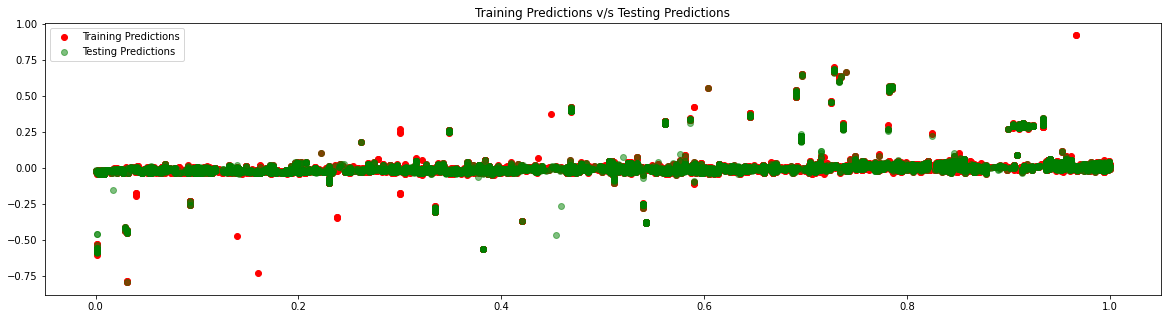

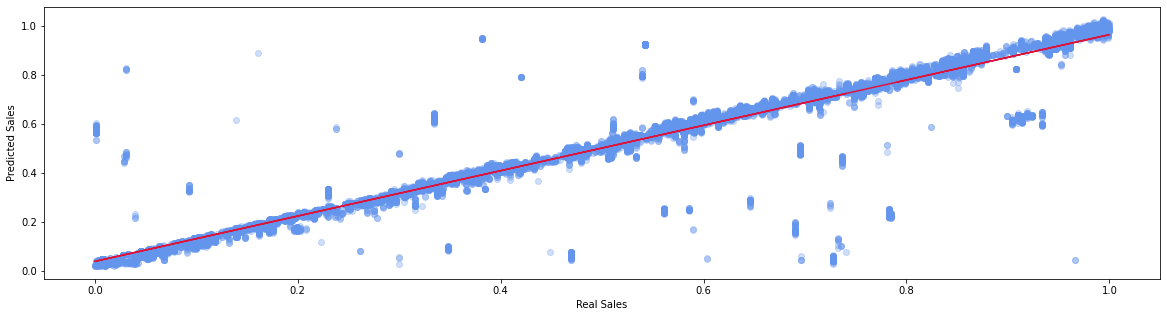

In [17]:
model2 = grid.best_estimator_
model2.fit(x_train,y_train)
Ridge_performance = model_performance(model2,model_name = model2)

# 3. Lasso

In [18]:
param_grid = {'alpha':np.random.rand(100)}
grid = GridSearchCV(Lasso(),param_grid = param_grid,cv=5)
grid.fit(x,y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.74977842, 0.3731038 , 0.23724368, 0.14989224, 0.57601187,
       0.02620114, 0.47730273, 0.39773624, 0.68658583, 0.80497836,
       0.46289498, 0.28291504, 0.13761572, 0.59237387, 0.70976641,
       0.7467658 , 0.96506277, 0.62067087, 0.11882045, 0.80949125,
       0.28217615, 0.28925858, 0.82471587, 0.7533142 , 0.95091725,
       0.16290521, 0.19...
       0.74282607, 0.23764909, 0.80940618, 0.65393439, 0.74649602,
       0.74464047, 0.2842728 , 0.87040739, 0.13267365, 0.29753203,
       0.72079365, 0.72221666, 0.6817565 , 0.73687838, 0.71692281,
       0.01881818, 0.20353024, 0.95737299, 0.23530634, 0.05675772,
       0.56625681, 0.85457808, 0.20059893, 0.1936252 , 0.21765236,
       0.30235314, 0.57342179, 0.13535129, 0.75444023, 0.91040862,
       0.19019492, 0.65329035, 0.51894406, 0.4931334 , 0.47070433])})

Model Performance for: Lasso(alpha=0.01881818345948405)

Training Score: 0.8728975863724564
Testing Score: 0.8735089946759754

Training Data MSE: 0.011028671326133879
Testing Data MSE: 0.011087180886228992

Training Data RMSE: 0.10501748105022267
Testing Data RMSE: 0.10529568313197361

Training Data MAE: 0.07657804458075508
Testing Data MAE: 0.0774089385004506

Training Data R2: 0.8728975863724564
Testing Data R2: 0.8735089946759754

Residual Analysis:


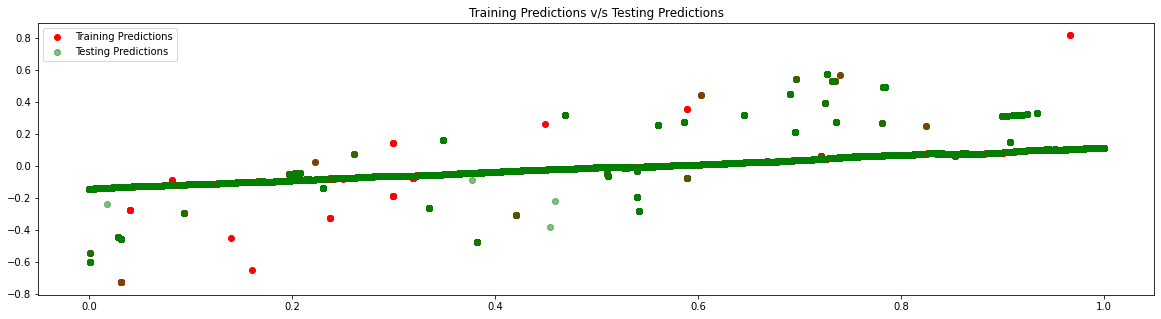

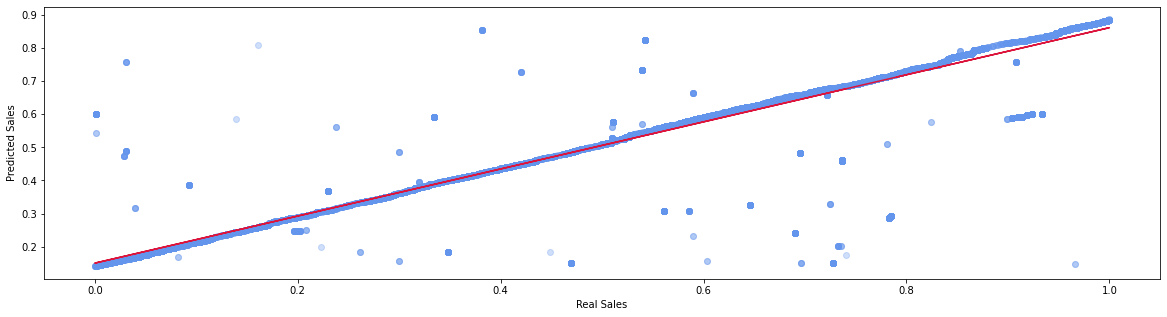

In [19]:
model3 = grid.best_estimator_
model3.fit(x_train,y_train)
Lasso_performance = model_performance(model3,model_name = model3)

# 4. RandomForest Regressor

In [20]:
param_grid = {'max_depth':np.arange(1,5),'min_samples_split':np.arange(2,5),'min_samples_leaf':np.arange(1,5)}
grid = GridSearchCV(RandomForestRegressor(),param_grid = param_grid,cv=4)
grid.fit(x,y)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([1, 2, 3, 4]),
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([2, 3, 4])})

Model Performance for: RandomForestRegressor(max_depth=2, min_samples_leaf=2, min_samples_split=3)

Training Score: 0.8822060701646519
Testing Score: 0.8830122138051866

Training Data MSE: 0.010220974561306117
Testing Data MSE: 0.01025420537767697

Training Data RMSE: 0.10109883560806285
Testing Data RMSE: 0.10126305040673507

Training Data MAE: 0.06879863413372815
Testing Data MAE: 0.06933052435959448

Training Data R2: 0.8822060701646519
Testing Data R2: 0.8830122138051866

Residual Analysis:


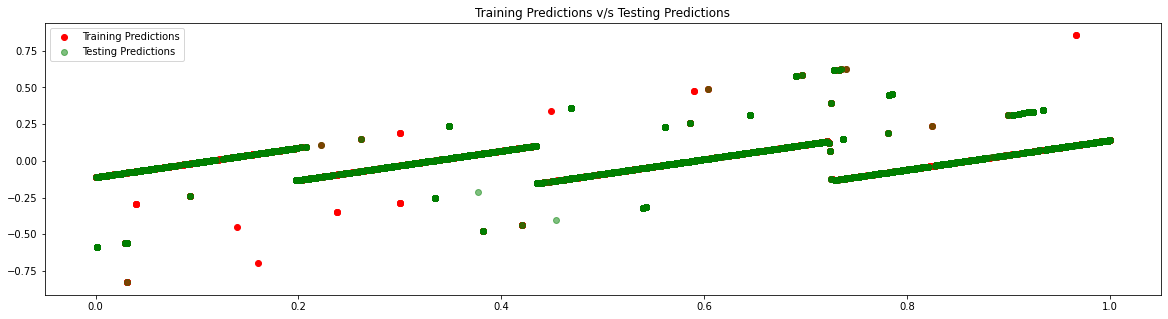

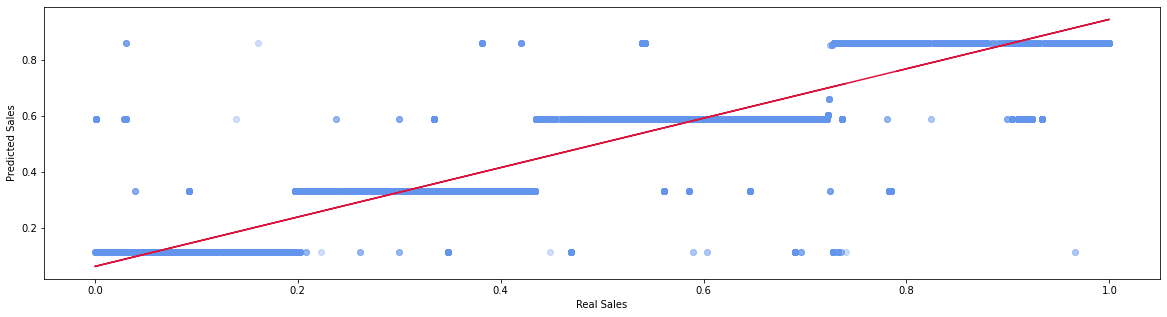

In [21]:
model5 = grid.best_estimator_
model5.fit(x_train,y_train)
RF_performance = model_performance(model5,model_name = model5)

# Model Performances

In [22]:
eval_performance = [["Linear Regression",LR_performance[0],LR_performance[1],LR_performance[2],LR_performance[3],LR_performance[4],LR_performance[5],LR_performance[6],LR_performance[7]],
                     ["Ridge",Ridge_performance[0],Ridge_performance[1],Ridge_performance[2],Ridge_performance[3],Ridge_performance[4],Ridge_performance[5],Ridge_performance[6],Ridge_performance[7]],
                     ["Lasso",Lasso_performance[0],Lasso_performance[1],Lasso_performance[2],Lasso_performance[3],Lasso_performance[4],Lasso_performance[5],Lasso_performance[6],Lasso_performance[7]],
                     ["Random Forest",RF_performance[0],RF_performance[1],RF_performance[2],RF_performance[3],RF_performance[4],RF_performance[5],RF_performance[6],RF_performance[7]],
                     ]

In [23]:
performance = pd.DataFrame(eval_performance,columns = ['Models',"Train Score","Test Score","Train MSE",'Test MSE','Train MAE',"Test MAE",'Train R2',"Test R2"])

In [24]:
performance

,Models,Train Score,Test Score,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2
0,Linear Regression,0.922811,0.924611,0.006698,0.006608,0.031617,0.032182,0.922811,0.924611
1,Ridge,0.922811,0.924611,0.006698,0.006608,0.031617,0.032182,0.922811,0.924611
2,Lasso,0.872898,0.873509,0.011029,0.011087,0.076578,0.077409,0.872898,0.873509
3,Random Forest,0.882206,0.883012,0.010221,0.010254,0.068799,0.069331,0.882206,0.883012


<AxesSubplot:title={'center':'Training R2 v/s Testing R2'}, xlabel='Models', ylabel='R-Squared Score'>

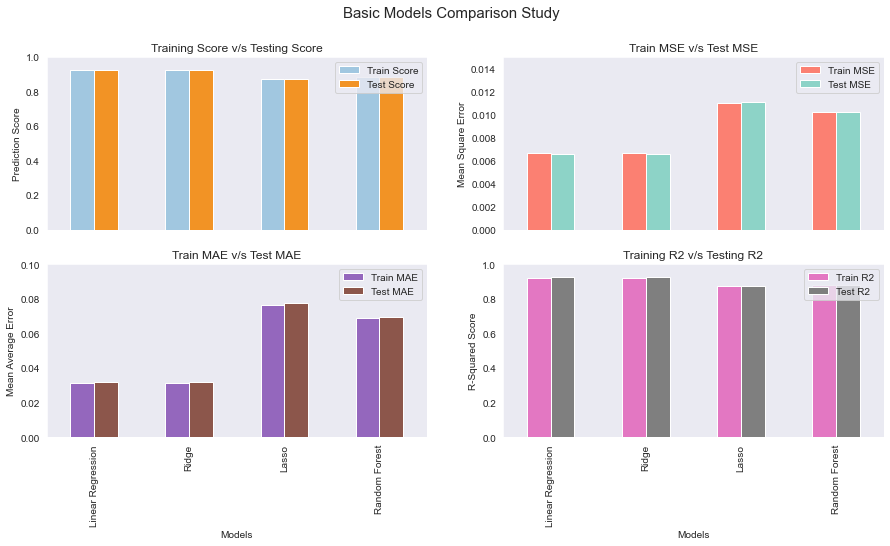

In [25]:
sb.set_style("dark")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True)
fig.suptitle('Basic Models Comparison Study', fontsize=15)

performance[["Models","Train Score", "Test Score"]].plot(ax=ax1, x="Models", ylabel="Prediction Score", kind="bar", 
                                                         title="Training Score v/s Testing Score", color=['#A1C7E0', "#F29325"], 
                                                         figsize=(15,7), ylim=(0,1))

performance[["Models","Train MSE", "Test MSE"]].plot(ax=ax2, x="Models", ylabel="Mean Square Error", kind="bar", 
                                                     title="Train MSE v/s Test MSE", color=['#fb8072', "#8dd3c7"],
                                                     figsize=(15,7), ylim=(0,0.015))

performance[["Models","Train MAE", "Test MAE"]].plot(ax=ax3, x="Models", ylabel="Mean Average Error", kind="bar", 
                                                     title="Train MAE v/s Test MAE", color=['#9467bd', "#8c564b"],
                                                     figsize=(15,7), ylim=(0,0.1))

performance[["Models","Train R2", "Test R2"]].plot(ax=ax4, x="Models", ylabel="R-Squared Score", kind="bar", 
                                                   title="Training R2 v/s Testing R2", color=['#e377c2', "#7f7f7f"],
                                                     figsize=(15,7), ylim=(0,1))